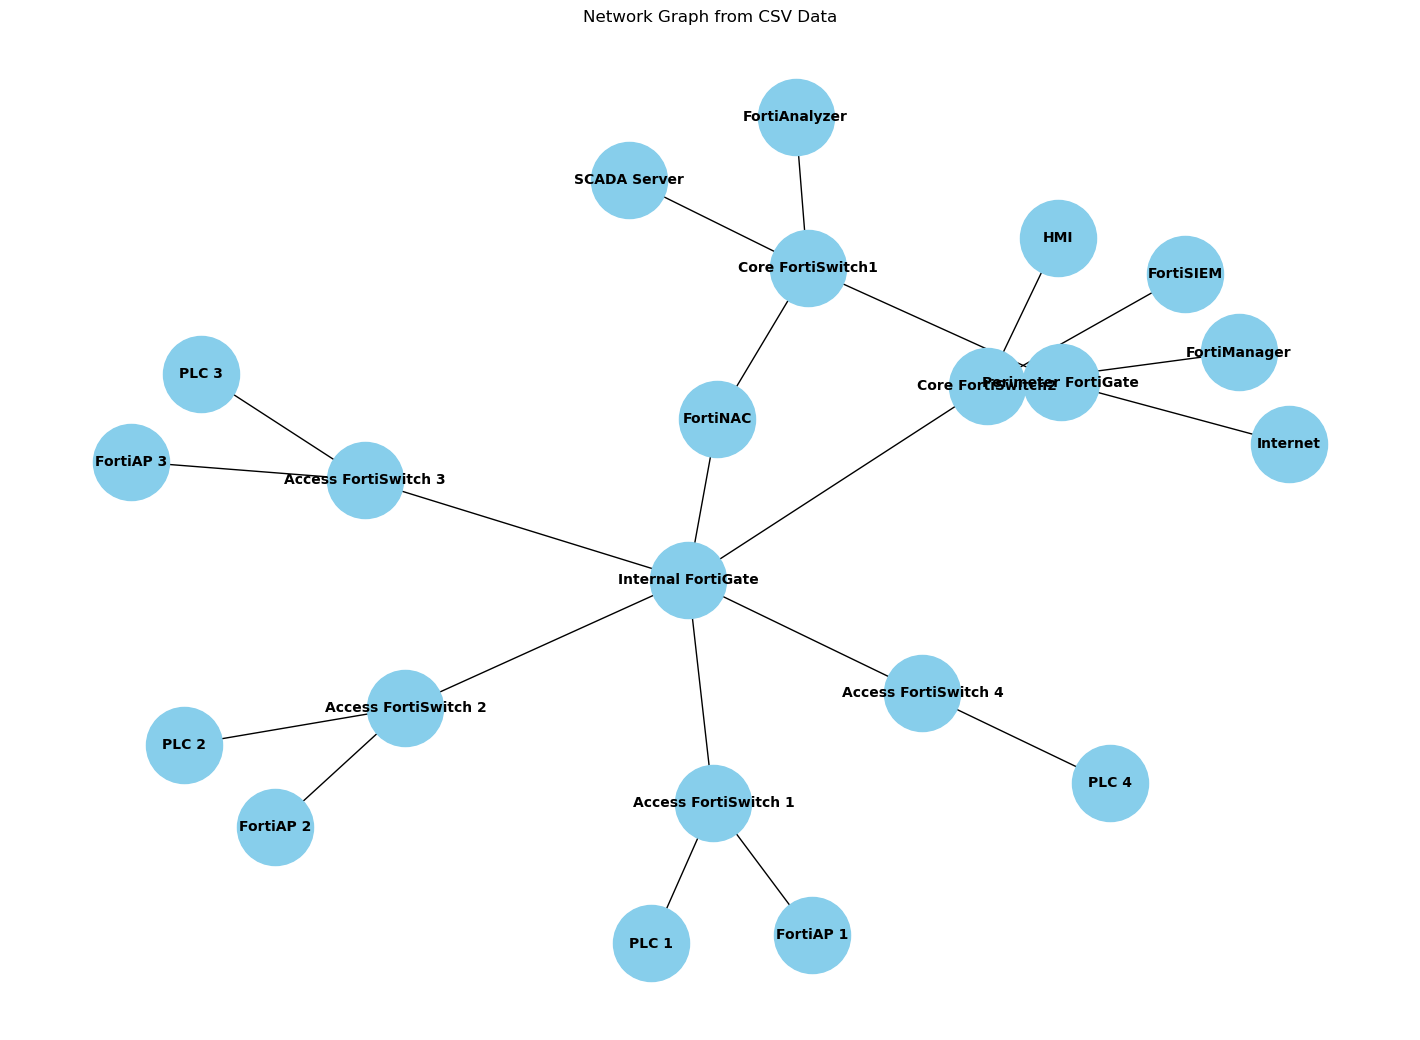

Adjacency Matrix:
     0    1    2    3    4    5    6    7    8    9   ...   12   13   14   15  \
0   0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
1   1.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
2   0.0  1.0  0.0  0.0  1.0  1.0  1.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
3   0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  1.0  ...  0.0  0.0  0.0  0.0   
4   0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
5   0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
6   0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
7   0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
8   0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
9   0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
10  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  ...  0.0  0.0  1.0  0.0   
11  0.0  0

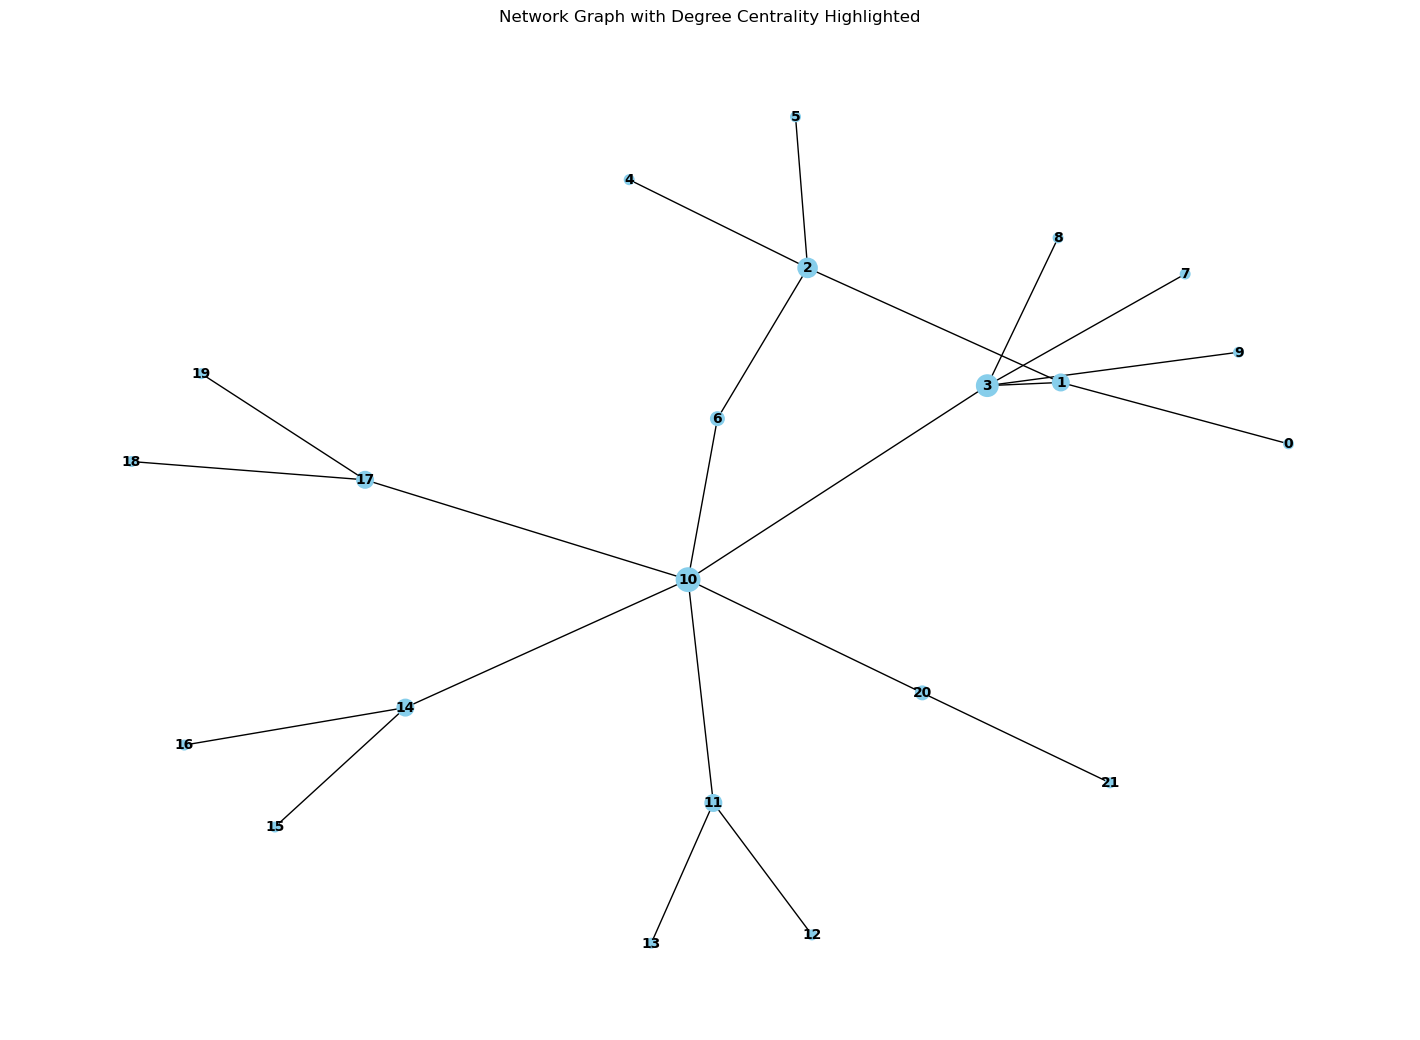

Spectral Radius of the Laplacian Matrix: 7.588478659653854 

Centrality Measures:
    Degree Centrality  Betweenness Centrality  Closeness Centrality  \
0            0.047619                0.000000              0.272727   
1            0.142857                0.152381              0.368421   
2            0.190476                0.195238              0.355932   
3            0.238095                0.385714              0.456522   
4            0.047619                0.000000              0.265823   
5            0.047619                0.000000              0.265823   
6            0.095238                0.171429              0.411765   
7            0.047619                0.000000              0.318182   
8            0.047619                0.000000              0.318182   
9            0.047619                0.000000              0.318182   
10           0.285714                0.757143              0.538462   
11           0.142857                0.185714              0.38181

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

# Load the nodes and edges data
nodes_df = pd.read_csv('ComplexNodes2.gml.csv')
edges_df = pd.read_csv('ComplexEdges2.gml.csv')

# Create an undirected graph
G = nx.Graph()

# Add nodes with labels and types of devices
for index, row in nodes_df.iterrows():
    G.add_node(row['Id'], label=row['Label'], shape=row.get('Shape', 'ellipse'))

# Add edges to represent connections
for index, row in edges_df.iterrows():
    G.add_edge(row['Source'], row['Target'])

# Define positions for nodes (this part should be adjusted based on actual layout if available)
pos = nx.spring_layout(G)

# Draw the graph
plt.figure(figsize=(14, 10))
nx.draw(G, pos, with_labels=False, node_size=3000, node_color='skyblue', font_size=10, font_weight='bold')

# Draw the labels separately
labels = nx.get_node_attributes(G, 'label')
nx.draw_networkx_labels(G, pos, labels, font_size=10, font_weight='bold')

plt.title("Network Graph from CSV Data")
plt.show()

# Initialize the adjacency matrix
node_labels = nodes_df['Id'].tolist()
node_indices = {label: index for index, label in enumerate(node_labels)}
num_nodes = len(node_labels)
adjacency_matrix = np.zeros((num_nodes, num_nodes))

# Fill the adjacency matrix
for _, row in edges_df.iterrows():
    source = row['Source']
    target = row['Target']
    source_index = node_indices[source]
    target_index = node_indices[target]
    adjacency_matrix[source_index, target_index] = 1
    adjacency_matrix[target_index, source_index] = 1  # For undirected graph

# Print the adjacency matrix
print("Adjacency Matrix:")
print(pd.DataFrame(adjacency_matrix, index=node_labels, columns=node_labels), "\n")

# Calculate eigenvalues and eigenvectors of the adjacency matrix
adj_eigenvalues, adj_eigenvectors = np.linalg.eig(adjacency_matrix)

# Format adjacency matrix eigenvalues for better display
adj_eigenvalues_df = pd.DataFrame(adj_eigenvalues).T

# Print adjacency matrix eigenvalues and eigenvectors
print("Adjacency Matrix Eigenvalues:")
print(adj_eigenvalues_df.to_string(index=False, header=False), "\n")

print("Adjacency Matrix Eigenvectors:")
print(pd.DataFrame(adj_eigenvectors, index=node_labels), "\n")

# Calculate the Laplacian matrix
laplacian_matrix = np.diag(adjacency_matrix.sum(axis=1)) - adjacency_matrix

# Print the Laplacian matrix
print("Laplacian Matrix:")
print(pd.DataFrame(laplacian_matrix, index=node_labels, columns=node_labels), "\n")

# Calculate eigenvalues and eigenvectors of the Laplacian matrix
lap_eigenvalues, lap_eigenvectors = np.linalg.eig(laplacian_matrix)

# Format Laplacian matrix eigenvalues for better display
lap_eigenvalues_df = pd.DataFrame(lap_eigenvalues).T

# Print Laplacian matrix eigenvalues and eigenvectors
print("Laplacian Matrix Eigenvalues:")
print(lap_eigenvalues_df.to_string(index=False, header=False), "\n")

print("Laplacian Matrix Eigenvectors:")
print(pd.DataFrame(lap_eigenvectors, index=node_labels), "\n")

# Calculate and print the spectral radius of the Laplacian matrix
spectral_radius = max(abs(lap_eigenvalues))
print("Spectral Radius of the Laplacian Matrix:", spectral_radius, "\n")

# Fiedler value and vector (second smallest eigenvalue and its corresponding eigenvector) of the Laplacian matrix
fiedler_index = np.argsort(lap_eigenvalues)[1]
fiedler_value = lap_eigenvalues[fiedler_index]
fiedler_vector = lap_eigenvectors[:, fiedler_index]

print("Fiedler Value of the Laplacian Matrix:", fiedler_value, "\n")
print("Fiedler Vector of the Laplacian Matrix:")
print(pd.DataFrame(fiedler_vector, index=node_labels).T, "\n")

# Calculate centrality measures
degree_centrality = nx.degree_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)
closeness_centrality = nx.closeness_centrality(G)
eigenvector_centrality = nx.eigenvector_centrality(G)

# Convert centrality measures to DataFrame for better visualization
centrality_df = pd.DataFrame({
    'Degree Centrality': degree_centrality,
    'Betweenness Centrality': betweenness_centrality,
    'Closeness Centrality': closeness_centrality,
    'Eigenvector Centrality': eigenvector_centrality
}).sort_index()

# Display centrality measures
print("Centrality Measures:")
print(centrality_df)

# Visualize the graph with degree centrality highlighted
plt.figure(figsize=(14, 10))
node_size = [v * 1000 for v in degree_centrality.values()]
nx.draw(G, pos, with_labels=True, node_size=node_size, node_color='skyblue', font_size=10, font_weight='bold')
plt.title("Network Graph with Degree Centrality Highlighted")
plt.show()

#Summarize Output Values
print("Spectral Radius of the Laplacian Matrix:", spectral_radius, "\n")
print("Centrality Measures:")
print(centrality_df)
